<a href="https://colab.research.google.com/github/miguelrferreiraf/correlation_static_data_cars/blob/main/analysing_static_data_cars_CODIGO_FINALIZADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
__author__ = "Miguel R. Ferreira Filho"
__email__ = "miguel.ribeiro@live.com"
__website__ = "miguelrferreiraf.github.io"

# Basic Data Science Project

## Analysing static data for correlation demonstration

<div align="center"><img src=https://img.freepik.com/free-vector/vector-cars-collection-vehicles-flat-style_1284-44161.jpg?w=2000 width=80%></div>

Let's check now some basic concepts in data analysis with the most basic data and tools. 

Here we demonstrate how to deal with univariate data. In this case, we'll analyse some cars features. Let's begin by miporting our libraries.


## Loanding basic data analysis libraries 

In [ ]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Getting data

In [ ]:
# loading dataset as Pandas dataframe
data = pd.read_csv("/content/drive/MyDrive/Códigos/Data_Scienc_Projects_(from-books)/analysing_car_data_static/data_image/automobile.csv")
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

## Data cleaning

Here lays one the most pipeline steps, whose absence may damage the whole algorithm running. Let's remove all caracteres that may cause code not to work well.

In [ ]:
# Find out the number of values which are not numeric
data['price'].str.isnumeric().value_counts()

# List out the values which are not numeric
data['price'].loc[data['price'].str.isnumeric() == False]

#Setting the missing value to mean of price and convert the datatype to integer
price = data['price'].loc[data['price'] != '?']
pmean = price.astype(int).mean()
data['price'] = data['price'].replace('?',pmean).astype(int)
data['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

In [ ]:
# Cleaning the horsepower losses field
data['horsepower'].str.isnumeric().value_counts()
horsepower = data['horsepower'].loc[data['horsepower'] != '?']
hpmean = horsepower.astype(int).mean()
data['horsepower'] = data['horsepower'].replace('?',hpmean).astype(int)
data['horsepower'].head()

0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: int64

In [ ]:
# Cleaning the Normalized losses field
data[data['normalized-losses']=='?'].count()
nl=data['normalized-losses'].loc[data['normalized-losses'] !='?'].count()
nmean=nl.astype(int).mean()
data['normalized-losses'] = data['normalized-losses'].replace('?',nmean).astype(int)
data['normalized-losses'].head()

0    164
1    164
2    164
3    164
4    164
Name: normalized-losses, dtype: int64

## Data analysis 

Let's demonstrate firstly some elementary shcool knowledge applied to data in basic python codes.

In [ ]:
#calculate mean, median and mode of dat set height
mean = data["height"].mean()
median =data["height"].median()
mode = data["height"].mode()
print(mean , median, mode)

53.72487804878049 54.1 0    50.8
dtype: float64


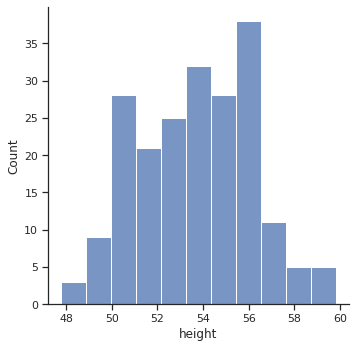

In [ ]:
#distribution plot
sns.FacetGrid(data,height=5).map(sns.histplot,"height").add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


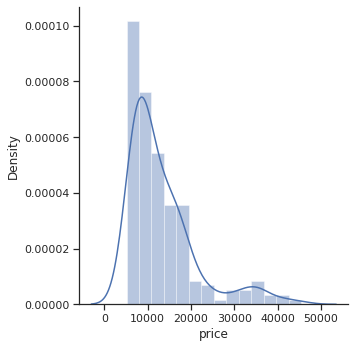

In [ ]:
#distribution plot
sns.FacetGrid(data,height=5).map(sns.distplot,"price").add_legend()

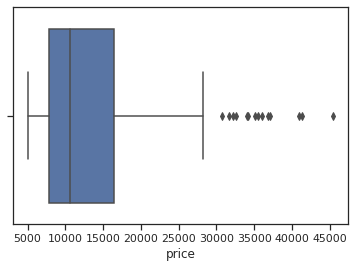

In [ ]:
#boxplot for price of cars
sns.boxplot(x="price",data=data)
plt.show()

Text(0, 0.5, 'price')

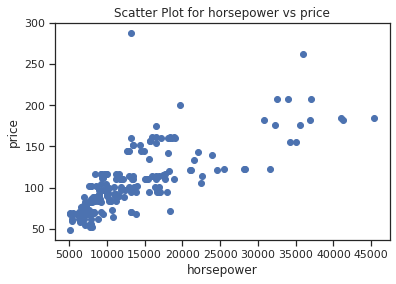

In [ ]:
# plot the relationship between “horsepower” and ”price”
plt.scatter(data["price"], data["horsepower"])
plt.title("Scatter Plot for horsepower vs price")
plt.xlabel("horsepower")
plt.ylabel("price")

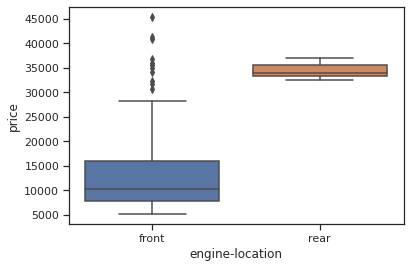

In [ ]:
#boxplot
sns.boxplot(x="engine-location",y="price",data=data)
plt.show()

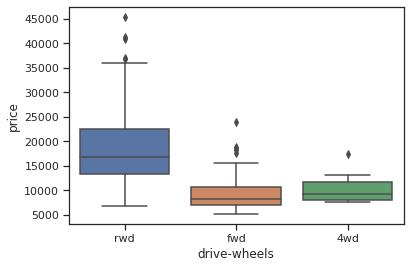

In [ ]:
#boxplot to visualize the distribution of "price" with types of "drive-wheels"
sns.boxplot(x="drive-wheels", y="price",data=data)

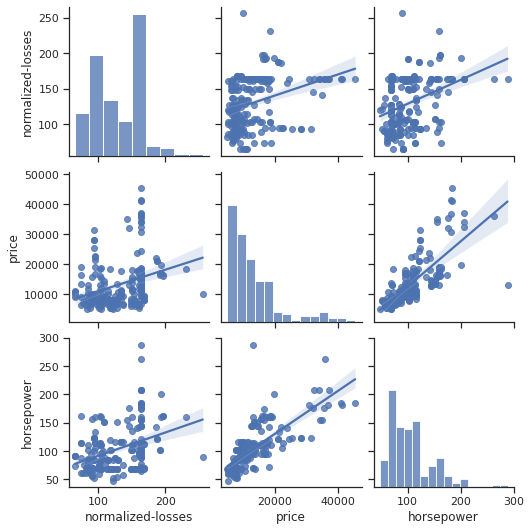

In [ ]:
# pair plot with plot type regression
sns.pairplot(data,vars = ['normalized-losses', 'price','horsepower'], kind="reg")
plt.show()

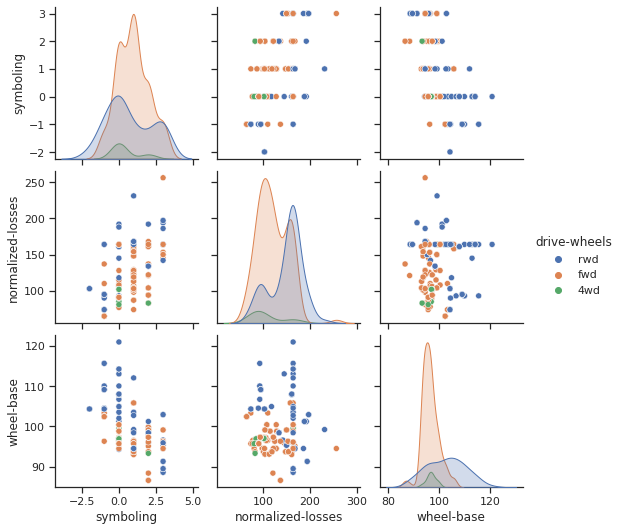

In [ ]:
#pair plot (matrix scatterplot) of few columns
sns.set(style="ticks", color_codes=True)

sns.pairplot(data,vars = ['symboling', 'normalized-losses','wheel-base'], hue="drive-wheels")

plt.show()

In [ ]:
from scipy import stats
corr = stats.pearsonr(data["price"], data["horsepower"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 1.5910332446597316e-39
cor:		 0.757945621793524


## Analysing correlation betwenn values

For now, we may use a little bit more sophisticated concept, yet still simple in data science subjetc: the coefficient correlation or Pearson correlation. As the name itself prenounces, it establishes how some part of data affetcs and is affected by other amount of it.

![pearson_correlation](http://drive.google.com/uc?id=1z3G1wcgOelu9fQ-cIWOeh0kMzbb-U4OL)

Assuming x and y as coordinates of some spreaded data and n the total number of data points, the correlation (r) is calculated like this:

<div align="center"><img src='http://drive.google.com/uc?id=17zOv5GYesjpF5SoURHqxqE6ZzTwq4SXc'></div>

In [ ]:
correlation = data.corr(method='pearson')
correlation

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.442093,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,0.071380,-0.035823,0.034606,-0.082201
normalized-losses,0.442093,1.000000,0.042699,0.155090,0.209908,-0.346399,0.262187,0.300268,-0.097432,0.371238,-0.344018,-0.307189,0.326489
wheel-base,-0.531954,0.042699,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,0.351985,-0.470414,-0.544082,0.583168
length,-0.357612,0.155090,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,0.554408,-0.670909,-0.704662,0.682986
width,-0.232919,0.209908,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,0.642176,-0.642704,-0.677218,0.728699
height,-0.541038,-0.346399,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.110114,-0.048640,-0.107358,0.134388
curb-weight,-0.227691,0.262187,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,0.750973,-0.757414,-0.797465,0.820825
engine-size,-0.105790,0.300268,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,0.810705,-0.653658,-0.677470,0.861752
compression-ratio,-0.178515,-0.097432,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,-0.205717,0.324701,0.265201,0.070990
horsepower,0.071380,0.371238,0.351985,0.554408,0.642176,-0.110114,0.750973,0.810705,-0.205717,1.000000,-0.803140,-0.770905,0.757946


Obviously, the best way to demonstrate the data number behavior is by images and not only numbers. That's the heatmap of correlations between all the features.

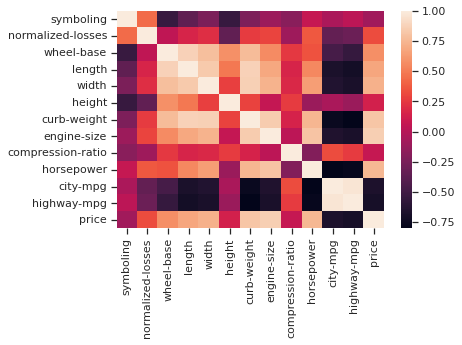

In [ ]:
sns.heatmap(correlation,xticklabels=correlation.columns,
yticklabels=correlation.columns)

In [ ]:
! jupyter nbconvert --to html analysing_static_data_cars_CODIGO_FINALIZADO.ipynb

[NbConvertApp] Converting notebook analysing_static_data_cars_CODIGO_FINALIZADO.ipynb to html
[NbConvertApp] Writing 633420 bytes to analysing_static_data_cars_CODIGO_FINALIZADO.html
